In [1]:
# ARC Simulation
from __future__ import division
from platform import python_version
print(python_version())

import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.10.4


In [2]:
sx=10
sy=10
sz=10
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 50
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                    )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


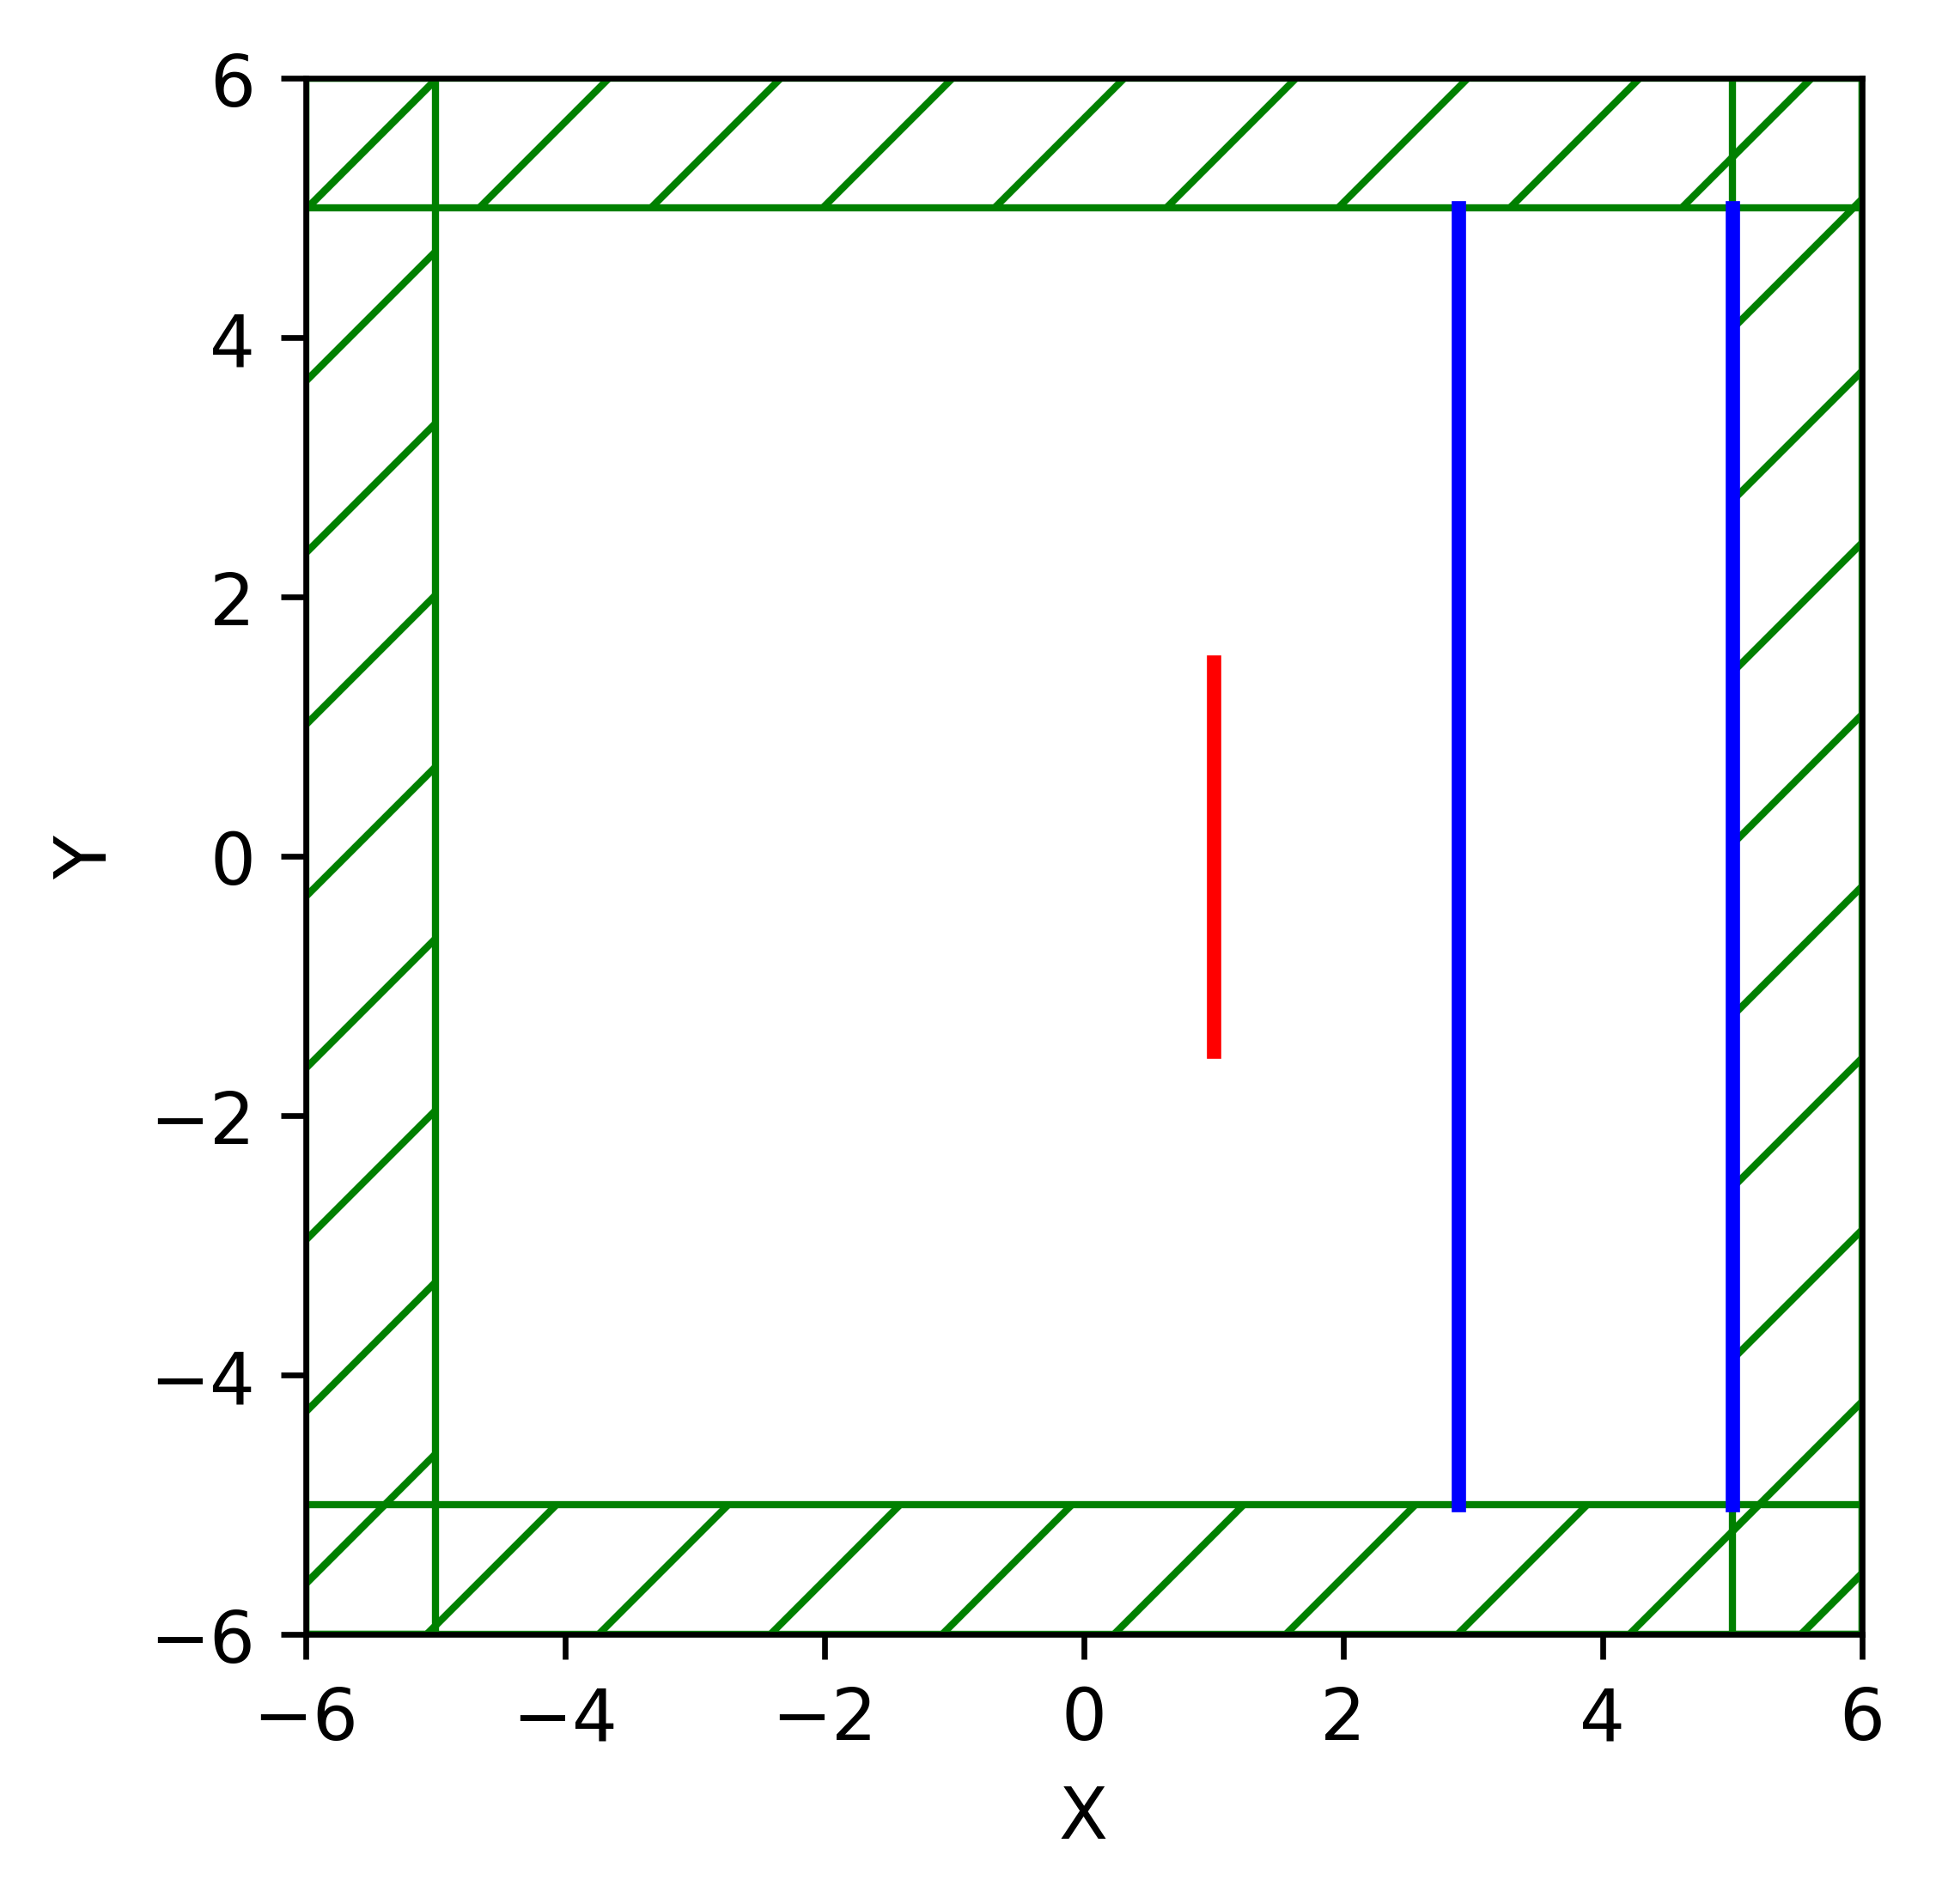

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                         )

refl_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                     )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                         )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                     )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000531197 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.74454 s
-----------
creating output file "./eps-000000.00.h5"...
on time step 1140 (time=11.4), 0.00351211 s/step
on time step 1709 (time=17.09), 0.00703497 s/step
field decay(t = 20.01): 0.39441514008126954 / 0.39441514008126954 = 1.0
on time step 2353 (time=23.53), 0.00621931 s/step
on time step 3177 (time=31.77), 0.00485614 s/step
field decay(t = 40.02): 2.747597499584308e-13 / 0.39441514008126954 = 6.966257682243545e-13
run 0 finished at t = 40.02 (4002 timesteps)


In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
#no_ARC_ttran_flux + no_ARC_rrefl_flux

-----------
Initializing structure...
time for choose_chunkdivision = 0.000478029 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.561645 s
lorentzian susceptibility: frequency=1.73, gamma=5
lorentzian susceptibility: frequency=2.76, gamma=0.126
lorentzian susceptibility: frequency=3.64, gamma=0
-----------
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


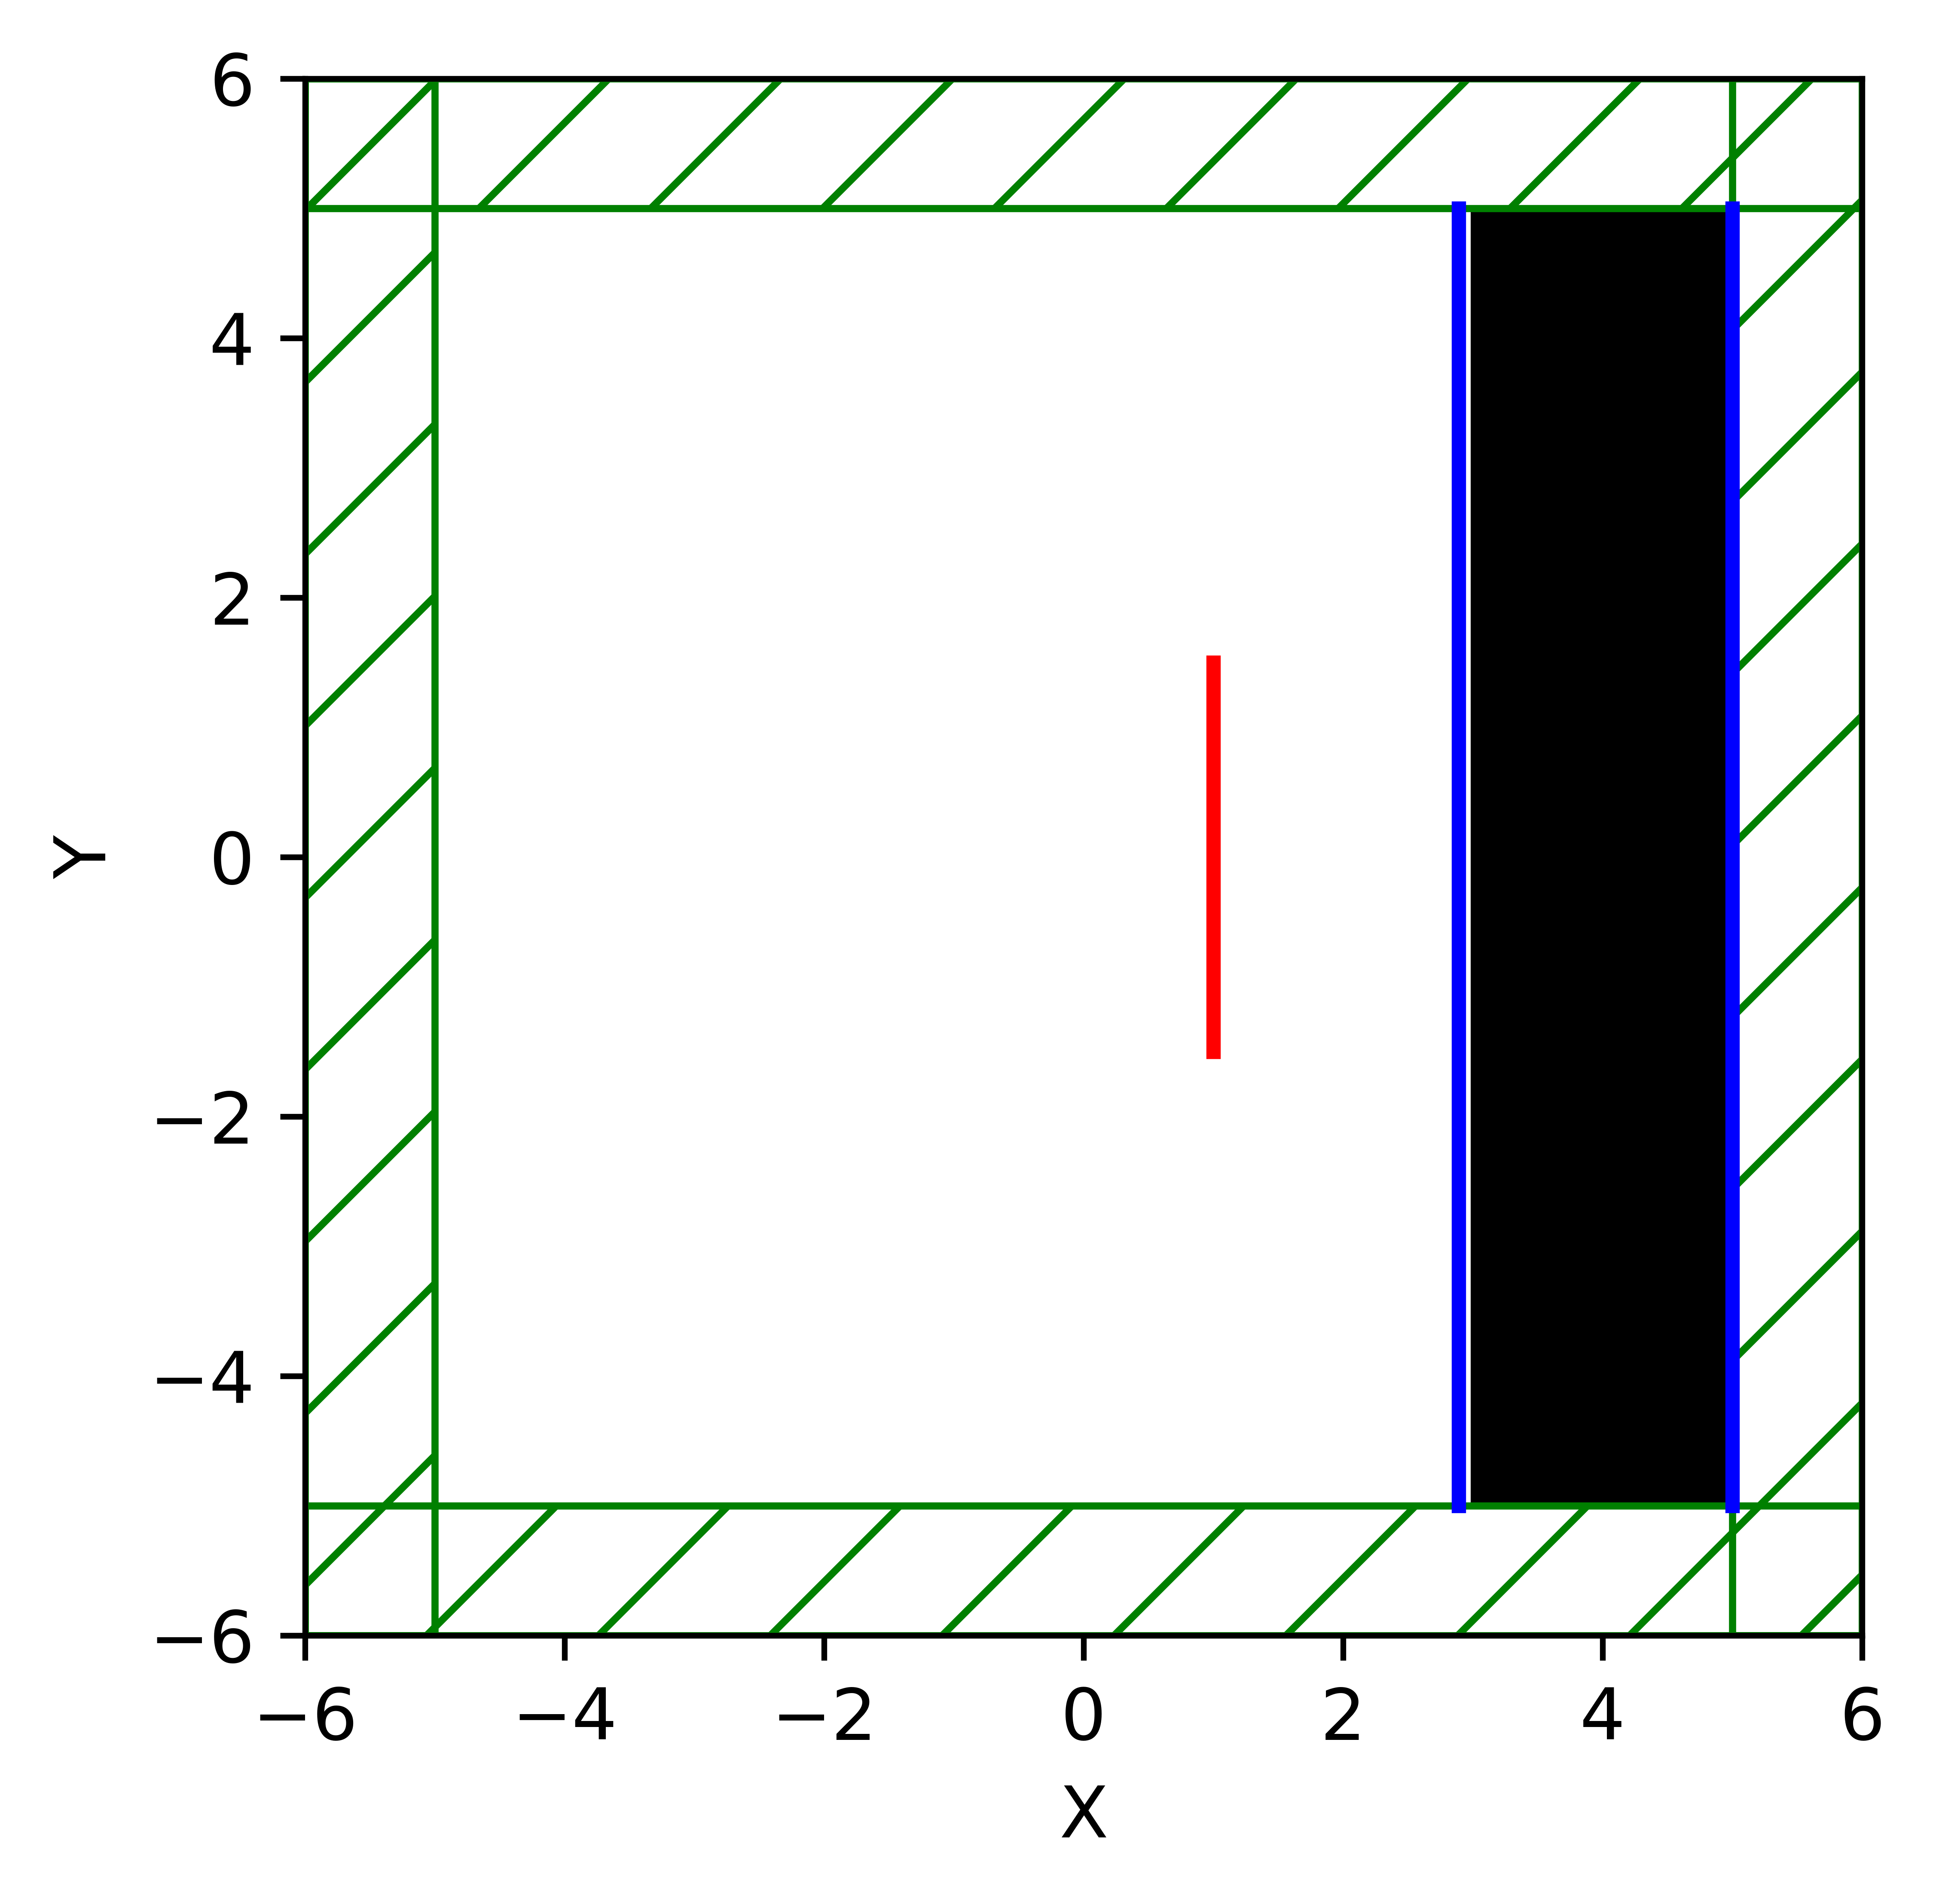

In [8]:
sim.reset_meep()
geometry = [mp.Block(
                    size=mp.Vector3(T_Si, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Si, 0),
                    material=cSi
                    ),
#            mp.Block(
#                    size=mp.Vector3(T_Arc, sy-2*dpml, mp.inf), 
#                    center=mp.Vector3(0.5*sx-dpml-0.5*T_Arc-T_Si, 0),
#                    material=SiO2)
           ]
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                   )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                                   )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                     )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=1200)
sim.plot2D()
plt.show()




In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000.00.h5"...
on time step 389 (time=3.89), 0.0103455 s/step
on time step 748 (time=7.48), 0.0111641 s/step
on time step 1080 (time=10.8), 0.0120673 s/step
on time step 1420 (time=14.2), 0.0117796 s/step
on time step 1939 (time=19.39), 0.00770769 s/step
field decay(t = 20.01): 0.0034224313501025395 / 0.0034224313501025395 = 1.0
on time step 2327 (time=23.27), 0.0103124 s/step
on time step 2574 (time=25.74), 0.0162302 s/step
on time step 2748 (time=27.48), 0.0231987 s/step
on time step 2833 (time=28.33), 0.0472772 s/step
on time step 3196 (time=31.96), 0.0110423 s/step
on time step 3697 (time=36.97), 0.00800053 s/step
field decay(t = 40.02): 0.0008705079692535192 / 0.0034224313501025395 = 0.25435366854836633
on time step 4209 (time=42.09), 0.00781848 s/step
on time step 4712 (time=47.12), 0.00796082 s/step
on time step 5237 (time=52.37), 0.0076312 s/step
on time step 5745 (time=57.45), 0.00788554 s/step
field decay(t = 60.03): 8.598348785661998e-06 / 0.003

In [10]:
#no_ARC_refl_data

In [11]:
#no_ARC_refl_flux

In [12]:
#no_ARC_tran_flux

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('wo_ARC.csv')

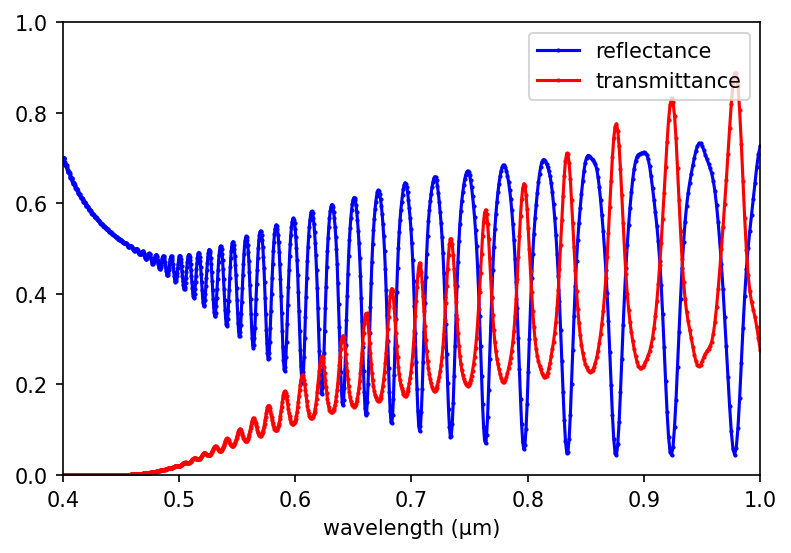

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance',markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance' ,markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption')
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()